# Step 1 and 2 
Importing the database and checking the pattern for coefficients depending on lambda.

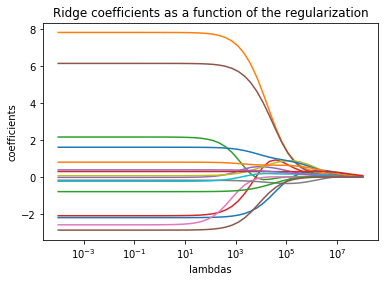

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')


dataset = pd.read_csv('hitters.csv')

coefs = []
errors = []
w = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
X = dataset.iloc[:, 0:-2].values
y = dataset.iloc[:, -2].values

lambdas = np.logspace(-4, 8, 50)

for lambd in lambdas:
    clf = Ridge(alpha=lambd)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))

ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('lambdas')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')

plt.show()

The graph above shows the pattern of lambdas. 

# Step 3

Calculating errors for different lambdas.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

lambdas = [0,4,1e10]
rmse = []

for lambd in lambdas:
    clf = Ridge(alpha=lambd)
    clf.fit(X, y)
    clf.fit(X_train, y_train)
    y_test_predicted = clf.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test,y_test_predicted)))
    print('Lambda : %d | Test Error %.3f'%(lambd,rmse[-1]))


Lambda : 0 | Test Error 331.188
Lambda : 4 | Test Error 331.082
Lambda : 10000000000 | Test Error 410.524


## Step 3.2 :

Calculating best lambda based on cross-validation.

In [13]:
lambdas = np.logspace(-6, 10, 200)
clf = RidgeCV(alphas=lambdas).fit(X_train, y_train)
y_test_predicted = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_test_predicted))
print('Best Lambda in Ridge | Test Error %.3f'%(rmse))

Best Lambda in Ridge | Test Error 312.384


The error here is quite less than the error calculated in hand-selected iterations.

# Step 4

Doing Lasso Regression

In [20]:
from sklearn.linear_model import Lasso
lambdas = [0,4,1e10]
rmse = []


for lambd in lambdas:
    clf = Lasso(alpha=lambd)
    clf.fit(X, y)
    clf.fit(X_train, y_train)
    y_test_predicted = clf.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test,y_test_predicted)))
    print('Lambda : %d | Test Error %.3f'%(lambd,rmse[-1]))

Lambda : 0 | Test Error 330.368
Lambda : 4 | Test Error 329.205
Lambda : 10000000000 | Test Error 419.682


## Step 4.2 :

Calculating best lambda based on cross-validation.

In [21]:
lambdas = np.logspace(-6, 10, 200)
clf = LassoCV(alphas=lambdas).fit(X_train, y_train)
y_test_predicted = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_test_predicted))
print('Best Lambda in Lasso | Test Error %.3f'%(rmse))

Best Lambda in Lasso | Test Error 325.539


## Conclusion

Lasso is not performing better job than Ridge.